#BÚSQUEDA DE CAMINOS



In [ ]:
#Clase Acción
class Accion:
  def __init__(self, nombre):
    self.nombre = nombre

  def __str__(self):
    return self.nombre

###Clase Estado

In [ ]:
#Clase Estado
class Estado:
  def __init__(self, nombre, acciones):
    self.nombre = nombre
    self.acciones = acciones

  def __str__(self):
    return self.nombre

###Clase Problema

In [ ]:
#Clase Problema.
class Problema:
  def __init__(self, estado_inicial, estados_objetivos, acciones, costes=None):
    self.estado_inicial = estado_inicial
    self.estados_objetivos = estados_objetivos
    self.acciones = acciones
    self.costes = costes
    self.infinito = 99999
    if not self.costes:
      self.costes = {}
      for estado in self.acciones.keys():
        self.costes[estado] = {}
        for accion in self.acciones[estado].keys():
          self.costes[estado][accion] = 1

  def __str__(self):
    msg = "Estado Inicial: {0} -> Objetivos: {1}"
    return msg.format(self.estado_inicial.nombre,self.estados_objetivos)

  # -- Determina si se alcanzó el objetivo
  def es_objetivo(self, estado):
    return estado in self.estados_objetivos

  # -- Determina el estado al que se llega del estado actual en base a la acción
  def resultado(self, estado, accion):
    if estado.nombre not in self.acciones.keys():
      return None
    # -- Recuperar diccionario de posibles acciones que se pueden realizar del estado actual
    acciones_estado = self.acciones[estado.nombre]
    if accion.nombre not in acciones_estado.keys():
      return None
    # -- Recupera y devuelve el nuevo estado alcanzado después de ejecutar la acción
    return acciones_estado[accion.nombre]

  # -- Determina el costo de una acción de un estado
  def coste_accion(self, estado, accion):
    if estado.nombre not in self.costes.keys():
      return self.infinito
    costes_estado = self.costes[estado.nombre]
    if accion.nombre not in costes_estado.keys():
      return self.infinito
    return costes_estado[accion.nombre]

  # -- Determina el costo del camino desde la raiz a un nodo dado
  def coste_camino(self, nodo):
    total = 0
    while nodo.padre:
      total += self.coste_accion(nodo.padre.estado, nodo.accion)
      nodo = nodo.padre
    return total


###Clase Nodo

In [ ]:
#Clase Nodo
class Nodo:
  def __init__(self, estado, accion=None, acciones=None, padre=None):
    self.estado = estado # -- Estado al que corresponde el nodo
    self.accion = accion # -- Acción mediante la cuál se llegó a este nodo
    self.acciones = acciones # -- Acciones posibles a realizar a partir de este nodo para llegar a los hijos
    self.padre = padre
    self.hijos = [] # -- Lista de nodos hijo (objetos) del nodo actual
    self.coste = 0

  def __str__(self):
    return self.estado.nombre

  # Método para expandir el nodo a los nodos hijo
  # -- Devuelve una lista de nodos hijo del nodo actual
  def expandir(self, problema):
    # -- Inicializar lista de nodos hijo
    self.hijos = []
    # -- Validar si el estado actual está o no en el contexto del problema
    if not self.acciones:
      if self.estado.nombre not in problema.acciones.keys():
        return self.hijos
      self.acciones = problema.acciones[self.estado.nombre]
    # -- Recuperar los nodos hijo en función a las acciones que se pueden realizar
    for accion in self.acciones.keys():
      accion_hijo = Accion(accion)
      nuevo_estado = problema.resultado(self.estado, accion_hijo)
      acciones_nuevo = {}
      if nuevo_estado.nombre in problema.acciones.keys():
        acciones_nuevo = problema.acciones[nuevo_estado.nombre]
      hijo = Nodo(nuevo_estado, accion_hijo, acciones_nuevo, self)
      # -- Determinar el costo del hijo
      coste = self.padre.coste if self.padre else 0
      coste += problema.coste_accion(self.estado, accion_hijo)
      hijo.coste = coste
      self.hijos.append(hijo)

    # -- Devuelve la lista de nodos hijo
    return self.hijos

  # Método para seleccionar el hijo con el costo óptimo
  def hijo_mejor(self, problema):
    if not self.hijos:
      return None
    mejor = self.hijos[0]
    for hijo in self.hijos:
      if (hijo.coste < mejor.coste):
        mejor = hijo
    return mejor



##Aplicación: Viajes en ciudades de España  

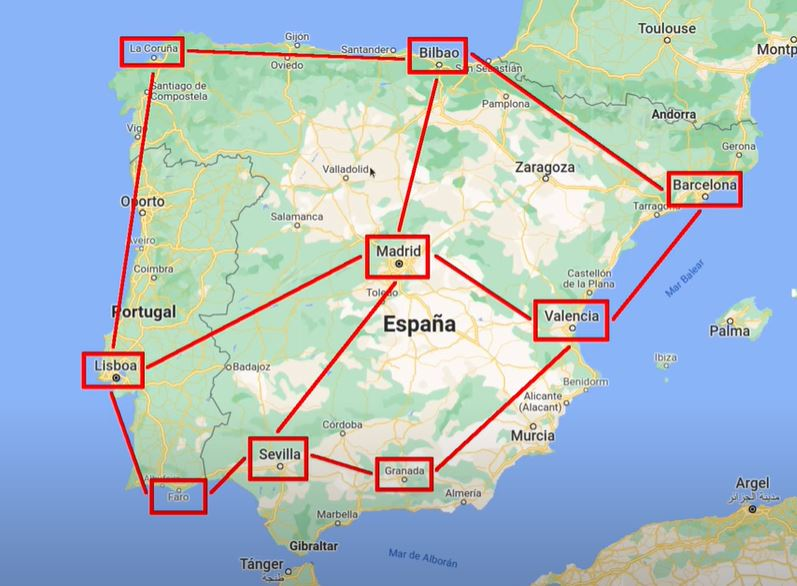

### Clase ViajesCiudades


In [ ]:
#Clase ViajesCiudades
class ViajesCiudades:

  def __init__(self):
    # -- Nombre de la clase
    self.nombre = 'Viajes por ciudades'

    # -- Definición de acciones
    accN = Accion('norte')
    accS = Accion('sur')
    accE = Accion('este')
    accO = Accion('oeste')

    # -- Definción de estados
    coruna = Estado('A Coruña',[accS, accE])
    bilbao = Estado('Bilbao',[accS, accE, accO])
    barcelona = Estado('Barcelona',[accS, accO])
    lisboa = Estado('Lisboa',[accN, accS, accE])
    madrid = Estado('Madrid',[accN, accS, accE, accO])
    valencia = Estado('Valencia',[accN, accS, accO])
    faro = Estado('Faro',[accN, accE, accO])
    sevilla = Estado('Sevilla',[accN, accE, accO])
    granada = Estado('Granada',[accN, accO])

    # -- Definición de viajes
    viajes = {'A Coruña':{'sur':lisboa,
                          'este':bilbao},
              'Bilbao':{'sur':madrid,
                        'oeste':barcelona,
                        'este':coruna},
              'Barcelona':{ 'sur':valencia,
                            'oeste':bilbao},
              'Lisboa':{'norte':coruna,
                        'sur':faro,
                        'este':madrid},
              'Madrid':{'norte':bilbao,
                        'sur':sevilla,
                        'este':valencia,
                        'oeste':lisboa},
              'Valencia':{'norte':barcelona,
                          'sur':granada,
                          'oeste':madrid},
              'Faro':{'norte':lisboa,
                      'este':sevilla},
              'Sevilla':{ 'norte':madrid,
                          'este':granada,
                          'oeste':faro},
              'Granada':{ 'norte':valencia,
                          'oeste':sevilla}}
    # -- Definición de costos
    costes = {'A Coruña':{'sur':608,
                          'este':545},
              'Bilbao':{'sur':408,
                        'oeste':613,
                        'este':545},
              'Barcelona':{ 'sur':350,
                            'oeste':613},
              'Lisboa':{'norte':608,
                        'sur':278,
                        'este':624},
              'Madrid':{'norte':408,
                        'sur':534,
                        'este':357,
                        'oeste':624},
              'Valencia':{'norte':350,
                          'sur':487,
                          'oeste':357},
              'Faro':{'norte':278,
                      'este':200},
              'Sevilla':{ 'norte':534,
                          'este':252,
                          'oeste':200},
              'Granada':{ 'norte':487,
                          'oeste':252}}


    # -- Definir el atributo lista de estados en el contexto del problema
    self.estados = [coruna, bilbao, barcelona, lisboa, madrid, valencia, faro, sevilla, granada]
    # -- Definir el atributo de los posibles viajes de una ciudad a otras
    self.viajes = viajes
    # -- Definir el atributo de los costos (en km) de los posibles viajes
    self.costes = costes

  def __str__(self):
    return self.nombre

  def DeterminarRuta(self):
    # -- Solicitar ciudad inicial y ciudad destino
    ciudad_inicial = input('Ingrese ciudad de partida: ')
    ciudad_destino = input('Ingrese ciudad de destino: ')
    # -- Generar estado_inicial y estados objetivo
    estado_inicial = [e for e in self.estados if e.nombre == ciudad_inicial][0]
    estados_objetivo = [e for e in self.estados if e.nombre == ciudad_destino]
    # -- Instanciar la clase Problema
    problema = Problema(estado_inicial, estados_objetivo, self.viajes, self.costes)
    # -- Crear nodo (raiz) para el estado incial
    nodo_raiz = Nodo(estado_inicial, None, problema.acciones[estado_inicial.nombre], None)
    nodo_actual = nodo_raiz
    # -- Efectuar recorrido desde ciudad inicial hasta ciudad destino
    estado_actual = estado_inicial
    objetivo_alcanzado = problema.es_objetivo(estado_actual)
    while not objetivo_alcanzado:
      # -- Recuperar las acciones que se pueden ejecutar desde el estado actual
      acciones_posibles = problema.acciones[estado_actual.nombre]
      # -- Recuperar las ciudades a las que se puede ir
      hijos_actual = nodo_actual.expandir(problema)
      # -- Mostrar las posibles ciudades
      print()
      print('Desde ',estado_actual.nombre, 'se puede llegar a las siguientes ciudades')
      print({hijo.accion.nombre:hijo.estado.nombre+'('+str(hijo.coste)+')' for hijo in hijos_actual})
      # -- Sugerir cuál es la mejor ruta con el respectivo costo
      hijo_mejor = nodo_actual.hijo_mejor(problema)
      print('Se sugiere la siguiente acción por ser la más óptima')
      print(hijo_mejor.accion.nombre,hijo_mejor.estado.nombre+'('+str(hijo_mejor.coste)+')')
      # -- Elegir nueva ruta
      accion = input('Ingrese que acción desea efectuar: ')
      # -- Determinar nueva ciudad a la que se llega con la ruta elegida
      estado_actual = [hijo.estado for hijo in hijos_actual if accion == hijo.accion.nombre][0]
      # -- Verificar si se alcanzó el objetivo
      objetivo_alcanzado = problema.es_objetivo(estado_actual)
      # -- Mostrar a la ciudad a la que se llegó con la ruta elegida
      if not objetivo_alcanzado:
        print('Ud. llegó a la ciudad de ', estado_actual.nombre)
        # -- Recuperar nodo del estado_actual
        nodo_actual = [nodo for nodo in nodo_actual.hijos if nodo.estado.nombre == estado_actual.nombre][0]
    # -- Mostrar mensaje que ya se alcanzó la ciudad objetivo
    print('Ud. alcanzó su objetivo, ya está en ', estado_actual.nombre)


###Programa principal

In [ ]:
# -- Crear una instancia de la clase de viajes de ciudades
viaje_ciudades = ViajesCiudades()
# -- Determinar rutas
viaje_ciudades.DeterminarRuta()


Ingrese ciudad de partida: Faro
Ingrese ciudad de destino: Barcelona

Desde  Faro se puede llegar a las siguientes ciudades
{'norte': 'Lisboa(278)', 'este': 'Sevilla(200)'}
Se sugiere la siguiente acción por ser la más óptima
este Sevilla(200)
Ingrese que acción desea efectuar: este
Ud. llegó a la ciudad de  Sevilla

Desde  Sevilla se puede llegar a las siguientes ciudades
{'norte': 'Madrid(534)', 'este': 'Granada(252)', 'oeste': 'Faro(200)'}
Se sugiere la siguiente acción por ser la más óptima
oeste Faro(200)
Ingrese que acción desea efectuar: este
Ud. llegó a la ciudad de  Granada

Desde  Granada se puede llegar a las siguientes ciudades
{'norte': 'Valencia(687)', 'oeste': 'Sevilla(452)'}
Se sugiere la siguiente acción por ser la más óptima
oeste Sevilla(452)
Ingrese que acción desea efectuar: norte
Ud. llegó a la ciudad de  Valencia

Desde  Valencia se puede llegar a las siguientes ciudades
{'norte': 'Barcelona(602)', 'sur': 'Granada(739)', 'oeste': 'Madrid(609)'}
Se sugiere la sigu